# Forberedelsen af data

In [1]:
#Libriaries & Models
import matplotlib
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Layer, LSTM, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import get_custom_objects
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import time


from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize

from scipy.spatial.distance import cdist
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

import os
import pickle

import importlib
import src
importlib.reload(src)

2024-12-20 15:31:51.951367: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Python random seed set.
NumPy random seed set.
TensorFlow (Keras) random seed set.
Python random seed set.
NumPy random seed set.
TensorFlow (Keras) random seed set.


<module 'src' from '/Users/hugojohnson/Desktop/Deep Learning/02456-deep-learning-project/src/__init__.py'>

Access the datasets

Data handling

In [2]:
X_train, X_test, y_train, y_test, scaler_X, scaler_y = src.dataset.load_split_data(shuffle=False, one_speed=True, all_features=True)
print(X_train.shape)
print(y_train.shape)

Loaded from pickle
(256000, 18)
(256000, 3)


# KNN Model

In [3]:
# Step 2: KNN Model
# Initialize KNN regressor with k neighbors (hyperparameter to tune)
k = 10  # You can tune this
knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')

# Fit the model
knn.fit(X_train, y_train)

# Step 3: Prediction
y_pred = knn.predict(X_test)

# Inverse transform the scaled predictions
# y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled)
# y_test_scaled = scaler_y.inverse_transform(y_test)

# Step 4: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0048


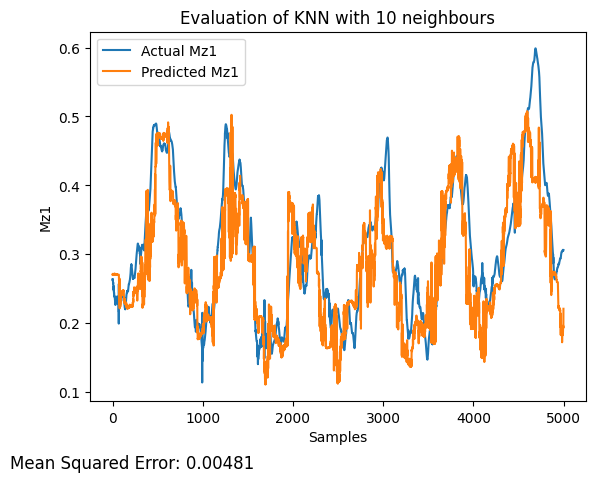

In [4]:
start = 0
# for i in range(10):
src.plots.evaluate_predictions(y_pred[:, 0][start:start+5000], y_test[:, 0][start:start+5000], mse=mse, name=f"KNN with {k} neighbours")
# start += 100

In [7]:
# Convert the tensor to a NumPy array
numpy_array = y_pred
# Convert the NumPy array to a DataFrame
df = pd.DataFrame(numpy_array)
# Save the DataFrame to a CSV file
df.to_csv('tensor_data.csv', index=False)